# **1. Introducción**

El mundo del vino es complejo y variado, con una gran cantidad de viñas, bodegas, fabricantes y marcas, por lo que tiene una gran complejidad la calidad de una copa de vino. Hoy en día las grandes empresas opacan a las bodegas familiares, y alejan de los consumidores vinos que tienen un proceso más artesanal y con una alta probabilidad de tener una calidad superior que vinos más procesados, vendidos por estas grandes empresas. Es por esto, que este trabajo se encargará de analizar las principales variables que afectan la calidad del vino, como lo son la acidez, los azúcares residuales, dióxido de sulfato, entre otros. A partir de esto analizaremos cómo influencian estas variables en la calidad, qué correlación puede existir entre las mismas y qué importancia tiene cada una a la hora de definir si un vino es superior o inferior. Una vez definido esto, junto con Machine Learning y métodos estadísticos, se buscará predecir si un vino es de buena o mala calidad a partir de las principales variables que lo afectan. Es por esto que este trabajo será de gran interés para aquellos fabricantes y/o bodegas que buscan la excelencia en sus productos, y maximizar su producción, saliendo del marketing tradicional y avasallante de las grandes empresas vitivinícolas.



In [1]:
# Importar Librerías
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from numpy import *
from google.colab import drive

In [2]:
# Montamos nuestra Unidad de Google Drive
#drive.mount('/content/gdrive', force_remount=True)

In [3]:
# Mediante Pandas, leemos la informacion de Nuestro Dataset almacenado en nuestro Drive.
#wine = pd.read_csv('/content/gdrive/MyDrive/winequalityN.csv')

In [4]:
wine = pd.read_csv('/content/winequalityN.csv')

In [5]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


**Preguntas/Hipótesis**

Los vinos tintos son superiores cuando su acidez es mayor, mientras que los blancos son superiores cuando su acidez es menor y un sabor más dulce.

¿Un vino blanco dulce es superior a uno demi-sec o seco?

¿El alcohol modifica el PH del vino?


# **2. Data Wrangling**

In [6]:
# Mostrar los datos que componen nuestro dataset.
wine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [7]:
# Mostrar el nombre de cada columna.
wine.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [8]:
# Dividimos el Dataset por tipo de Vino (Blanco/Tinto)
wine_r = wine.loc[wine.loc[:,'type'] == 'red'].reset_index().drop(['index'], axis=1)
wine_w = wine.loc[wine.loc[:,'type'] == 'white'].reset_index().drop(['index'], axis=1)
wine_w

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,white,6.5,NaN,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


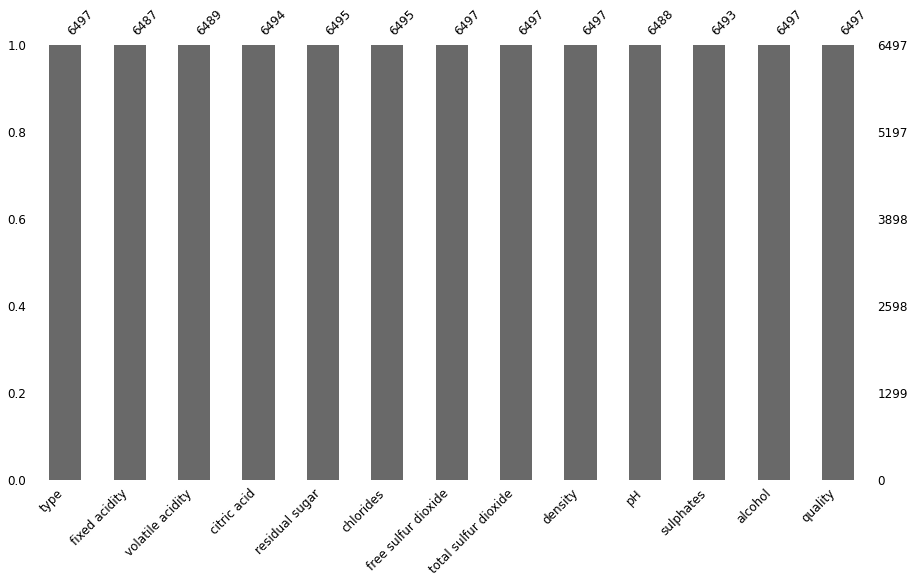

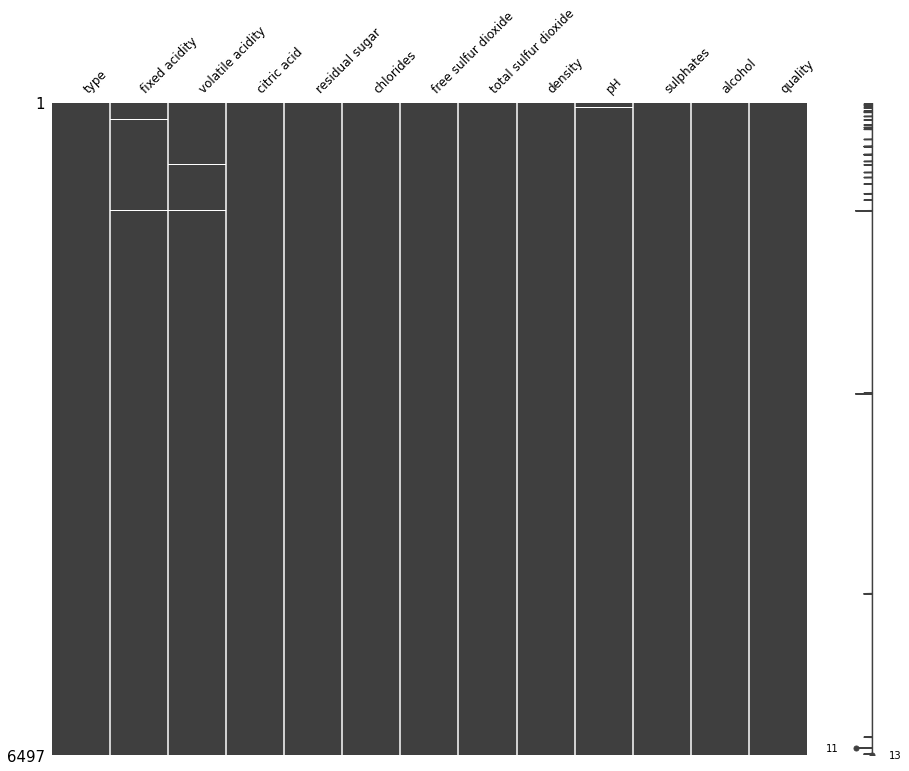

In [9]:
# Valores Nulos Graficados.
msno.bar(wine,figsize=(15,8),fontsize=12)
msno.matrix(wine,figsize=(15,12),fontsize=12)


In [10]:
# Proporción de Valores nulos por tipo de Vino y el total.


NaN_w = wine_w.isnull().sum()
na_ratio_w = ((wine_w.isnull().sum() / len(wine_w))*100)

NaN_r = wine_r.isnull().sum()
na_ratio_r = ((wine_r.isnull().sum() / len(wine_r))*100)

NaN = wine.isnull().sum()
na_ratio = ((wine.isnull().sum() / len(wine))*100)

Total_NaN = pd.DataFrame({f'Wine_w: {len(wine_w)}': NaN_w,'NaN_w_%': na_ratio_w,
                          f'Wine_r: {len(wine_r)}': NaN_r,'NaN_r_%': na_ratio_r,
                          f'Wine_t: {len(wine)}'  : NaN,'NaN_t_%'  : na_ratio})

Total_NaN = Total_NaN.rename_axis('Column').reset_index()

Total_NaN

,Column,Wine_w: 4898,NaN_w_%,Wine_r: 1599,NaN_r_%,Wine_t: 6497,NaN_t_%
0,type,0,0.000000,0,0.000000,0,0.000000
1,fixed acidity,8,0.163332,2,0.125078,10,0.153917
2,volatile acidity,7,0.142915,1,0.062539,8,0.123134
3,citric acid,2,0.040833,1,0.062539,3,0.046175
4,residual sugar,2,0.040833,0,0.000000,2,0.030783
5,chlorides,2,0.040833,0,0.000000,2,0.030783
6,free sulfur dioxide,0,0.000000,0,0.000000,0,0.000000
7,total sulfur dioxide,0,0.000000,0,0.000000,0,0.000000
8,density,0,0.000000,0,0.000000,0,0.000000
9,pH,7,0.142915,2,0.125078,9,0.138525


In [11]:
# Dada la baja cantidad de valores nulos, siendo el máximo un 0,15% en campo
# fixed acidity, no afecta a la información del dataset, mencionado esto se 
# procederá a quitar las filas nulas.


wine_r = wine_r.dropna(axis=0)
wine_w = wine_w.dropna(axis=0)
wine = wine.dropna(axis=0)

In [12]:
# Validar eliminación de Valores nulos.


NaN_w = wine_w.isnull().sum()
na_ratio_w = ((wine_w.isnull().sum() / len(wine_w))*100)


NaN_r = wine_r.isnull().sum()
na_ratio_r = ((wine_r.isnull().sum() / len(wine_r))*100)


NaN = wine.isnull().sum()
na_ratio = ((wine.isnull().sum() / len(wine))*100)


Total_NaN = pd.DataFrame({f'Wine_w: {len(wine_w)}': NaN_w,'NaN_w_%': na_ratio_w,
                          f'Wine_r: {len(wine_r)}': NaN_r,'NaN_r_%': na_ratio_r,
                          f'Wine_t: {len(wine)}': NaN,'NaN_t_%': na_ratio})


Total_NaN = Total_NaN.rename_axis('Column').reset_index()

Total_NaN

,Column,Wine_w: 4870,NaN_w_%,Wine_r: 1593,NaN_r_%,Wine_t: 6463,NaN_t_%
0,type,0,0.0,0,0.0,0,0.0
1,fixed acidity,0,0.0,0,0.0,0,0.0
2,volatile acidity,0,0.0,0,0.0,0,0.0
3,citric acid,0,0.0,0,0.0,0,0.0
4,residual sugar,0,0.0,0,0.0,0,0.0
5,chlorides,0,0.0,0,0.0,0,0.0
6,free sulfur dioxide,0,0.0,0,0.0,0,0.0
7,total sulfur dioxide,0,0.0,0,0.0,0,0.0
8,density,0,0.0,0,0.0,0,0.0
9,pH,0,0.0,0,0.0,0,0.0


#**3. Exploratory Data Analysis (EDA)**



Text(0.5, 1.0, 'Cantidad por tipo de vino')

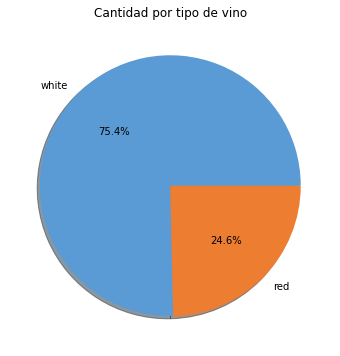

In [13]:
# En primera instancia es importante saber la magnitud por tipo de vino para
# empezar a comprender los datos.
# El Dataframe con más información es el vino blanco, 
# con un 75,4% del total del dataset.

Tipos_de_Vino = wine['type'].value_counts()
Tipos_de_Vino

fig,ax = plt.subplots(figsize =(10, 6))
ax.pie(Tipos_de_Vino, labels = ['white','red'], colors=['#5B9BD5','#ED7D31'], autopct = '%1.1f%%',shadow=True)
ax.set_title('Cantidad por tipo de vino')

Text(0.5, 1.0, 'Calidad Promedio por Tipo')

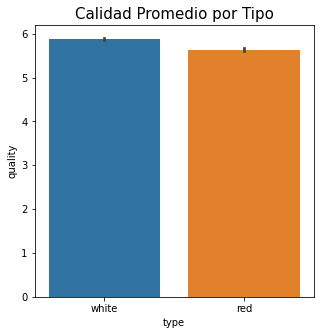

In [14]:
# En promedio el tipo de vino con mejor nota es el vino blanco, aunque estan
# bastante cerca entre sí.

fig = plt.figure(figsize = (5,5))
ax = sns.barplot(y = 'quality', x = 'type', data = wine, estimator=mean)
ax.set_title('Calidad Promedio por Tipo', fontsize=15)

Text(0.5, 1.0, 'Cantidad por Calidad')

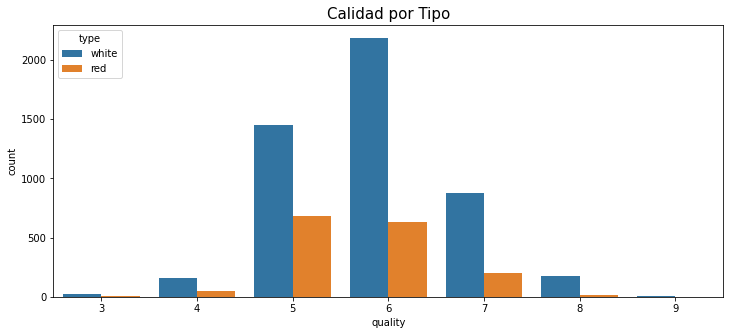

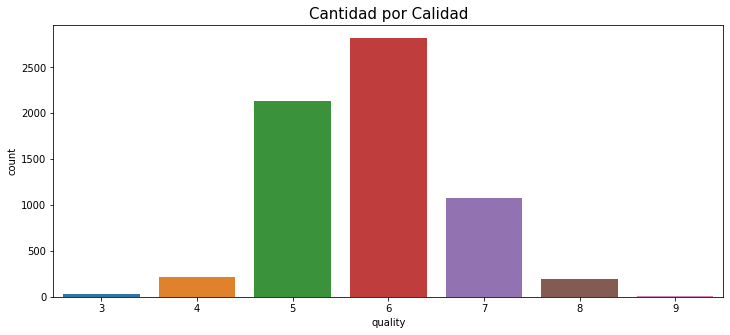

In [15]:
# Para entender cada variable, realizaremos un gráfico por cada columna en 
# conjunto con la calificación del vino por tipo y total para comprender la 
# relación en cada caso.

fig = ax = plt.figure(figsize = (12,5))
ax = sns.countplot(data=wine, x="quality", hue="type")
ax.set_title('Calidad por Tipo', fontsize=15)

fig, ax = plt.subplots(figsize = (12,5))
ax = sns.countplot(x="quality", data=wine)
ax.set_title('Cantidad por Calidad', fontsize=15)

Text(0.5, 1.0, 'Acidez Fija Total')

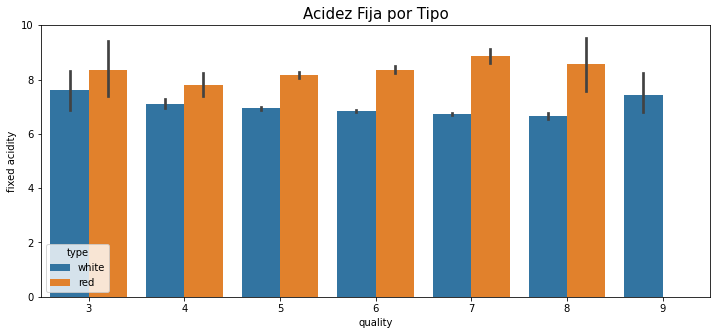

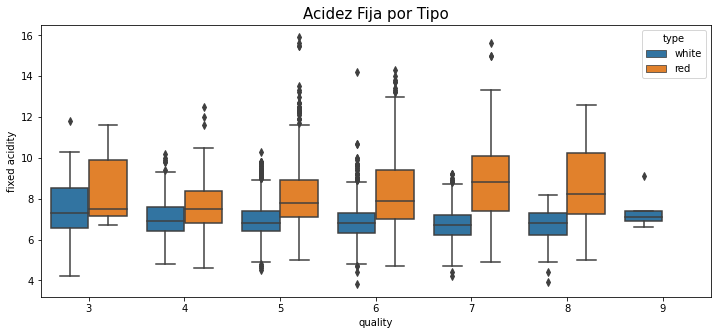

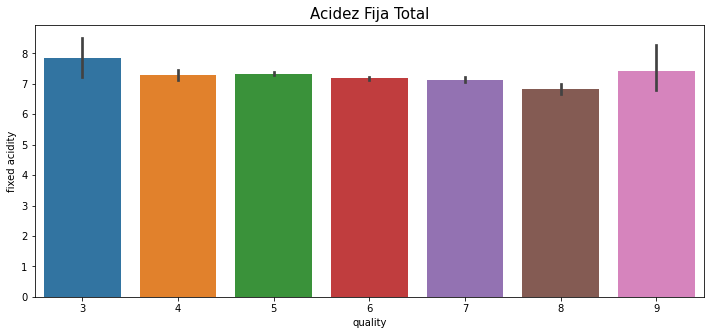

In [16]:
# Graficamos la Acidez Fija Total para cada tipo de Vino.

"""
Acidez Fija: Característica propia del vino, se utiliza como conservante y como corrector de acidez.

El vino tinto tiene una ligera alza mientras aumenta su calidad, a diferencia del vino blanco que tiendea a disminuir, excluyendo la calificación 9.

Para esta variable existen outliers bastante marcados para el vino tinto con calificación 5.

"""

fig = ax = plt.figure(figsize = (12,5))
ax = sns.barplot(data=wine, x="quality",y = 'fixed acidity', hue="type")
ax.set_title('Acidez Fija por Tipo', fontsize=15)

fig = ax = plt.figure(figsize = (12,5))
ax = sns.boxplot(data=wine, x="quality",y = 'fixed acidity', hue="type")
ax.set_title('Acidez Fija por Tipo', fontsize=15)

fig = ax = plt.figure(figsize = (12,5))
ax = sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)
ax.set_title('Acidez Fija Total', fontsize=15)


Text(0.5, 1.0, 'Acidez Variable Total')

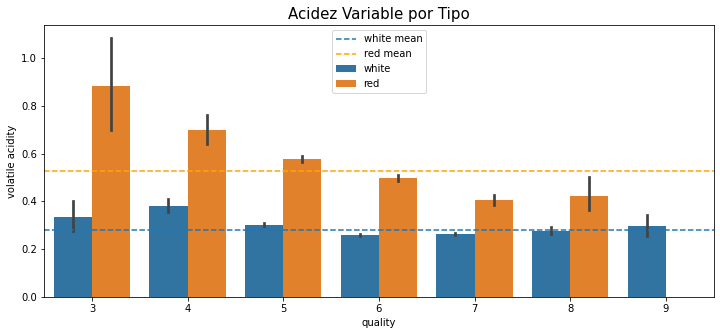

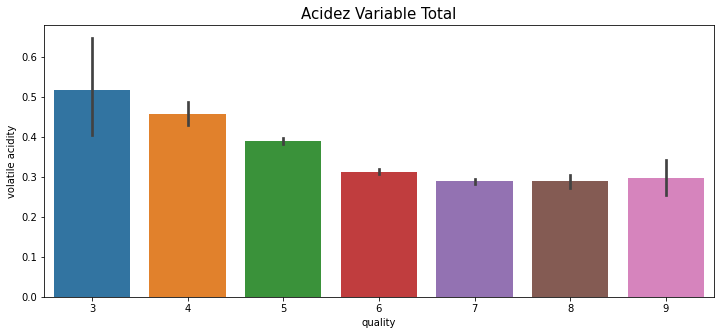

In [17]:
# Graficamos la Acidez Variable Total para cada tipo de Vino.

"""

Acidez Variable: Se forma como consecuencia de la fermentación, producto secundario, o durante el almacenamiento debido al deterioro del vino terminado.

Tiende a disminuir considerablemente en los vinos tintos, a diferencia del vino blanco que las calificaciones están muy cercanas a la media.

Un outlier muy marcado es el vino tinto con calificación 3

"""

fig = ax = plt.figure(figsize = (12,5))
ax = sns.barplot(data=wine, x="quality",y = 'volatile acidity', hue="type")
ax.set_title('Acidez Variable por Tipo', fontsize=15)
ax.axhline(y=wine_w['volatile acidity'].mean(),linestyle = '--',label = "white mean")
ax.axhline(y=wine_r['volatile acidity'].mean(),color = 'orange',linestyle = '--',label = "red mean")
ax.legend()

fig = ax = plt.figure(figsize = (12,5))
ax = sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)
ax.set_title('Acidez Variable Total', fontsize=15)

Función para Graficar las Variables del Vino.

In [18]:
# Funcion para Graficar diferentes variables del Vino.

def graficar_variables (valor, titulo):
  fig = ax = plt.figure(figsize = (12,5))
  ax = sns.barplot(data=wine, x="quality",y = valor, hue="type")
  ax.set_title(titulo, fontsize=15)

  fig = ax = plt.figure(figsize = (12,5))
  ax = sns.boxplot(data=wine, x="quality",y = valor, hue="type")
  ax.set_title(titulo, fontsize=15)


  fig = ax = plt.figure(figsize = (12,5))
  ax = sns.barplot(x = 'quality', y = valor, data = wine)
  ax.set_title(titulo, fontsize=15)

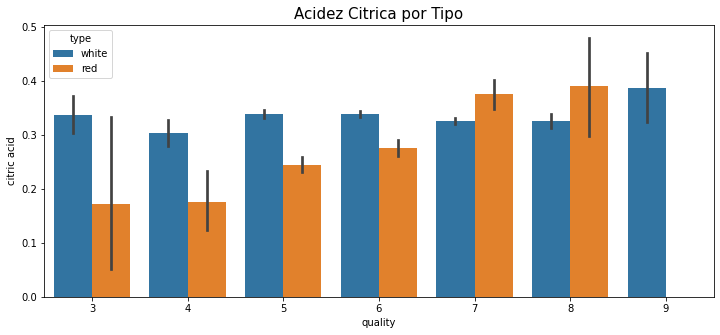

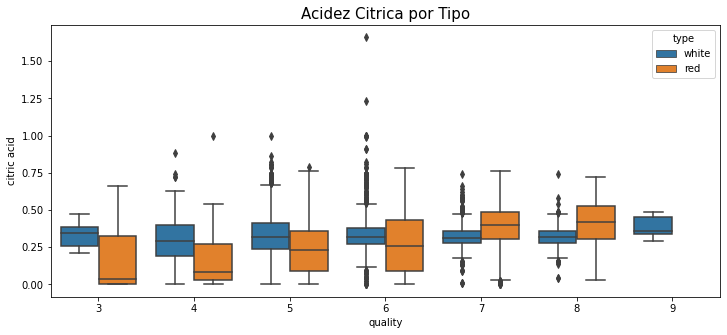

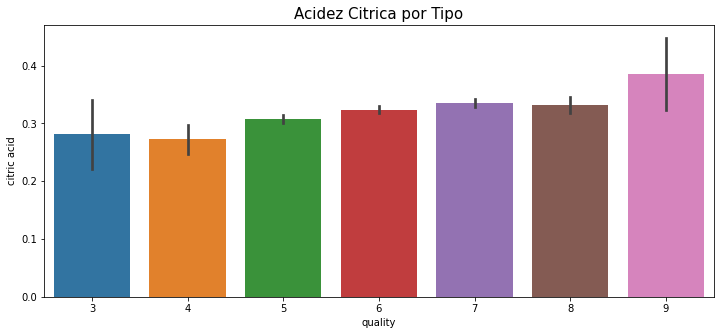

In [19]:
# Graficamos Acidez Citrica Total

"""
Acidez Cítrica: Confiere una cierta frescura a los vinos.

Para el vino tinto, tiende a aumentar considerablemente mientras este aumenta su calidad, en el caso del vino blanco es bastante variable, en general suelen tener la misma cantidad de acido cítrico.

Gráficamente el vino blanco con calificación 6 tiene datos que superan en gran magnitud el comportamiento de esta variable

"""

graficar_variables('citric acid', 'Acidez Citrica por Tipo')

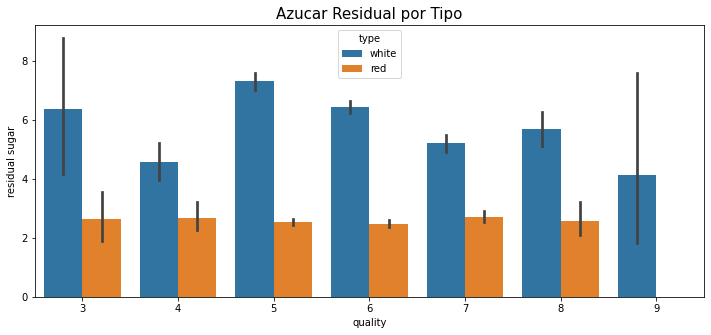

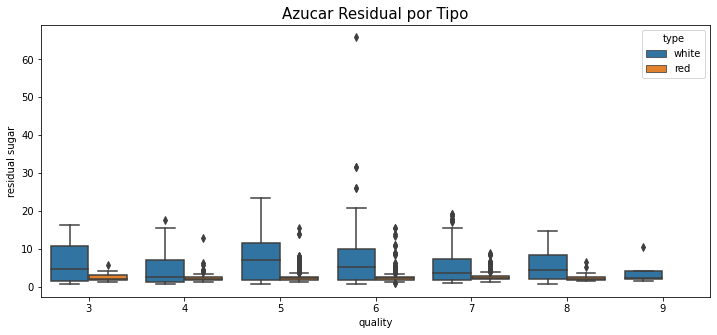

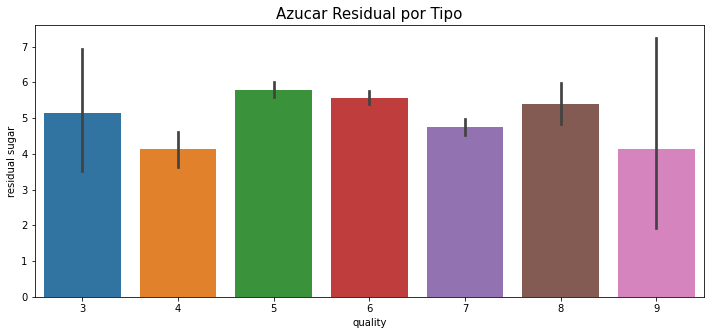

In [20]:
# Graficamos Azucar Residual

"""
Azucar Residual: cantidad total de azucar que no ha sido fermentada

En el caso del vino tinto se mantienen bajos los niveles de azucar residual, en el caso del vino blanco es bastante variable, con valores más altos que el vino tinto.

Gráficamente el vino blanco con calificación 6 tiene datos que superan en gran magnitud el comportamiento de esta variable

"""

graficar_variables('residual sugar', 'Azucar Residual por Tipo')

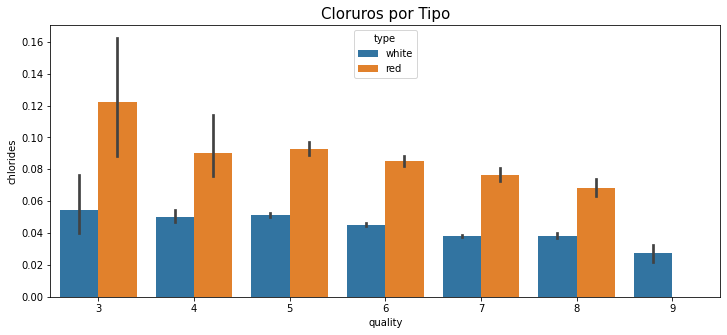

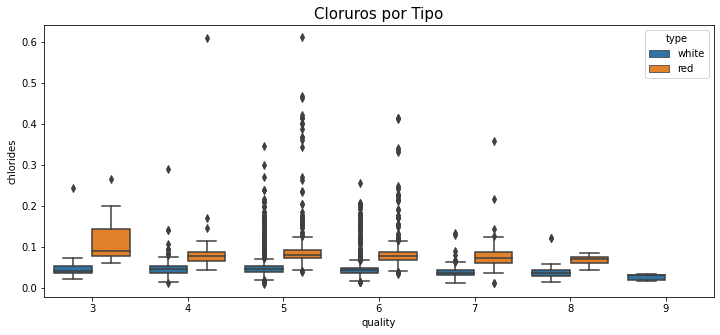

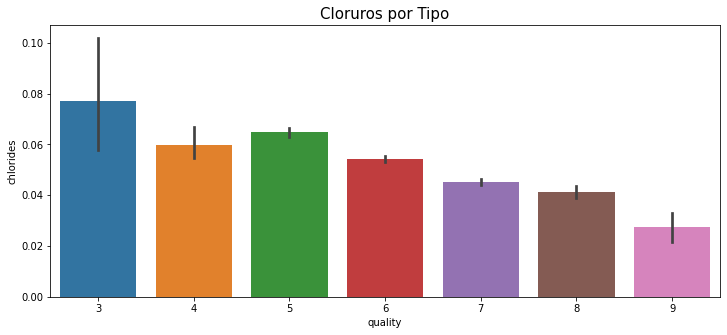

In [21]:
# Graficamos los Cloruros

"""
Cloruros: Ayuda a equilibrar el PH

En ambos casos tiende a la baja, en el caso del vino tinto manteniendo niveles más altos que el vino blanco.

Gráficamente el vino tinto con calificación 4 y 5 tiene datos que superan en gran magnitud el comportamiento de esta variable

"""

graficar_variables('chlorides', 'Cloruros por Tipo')

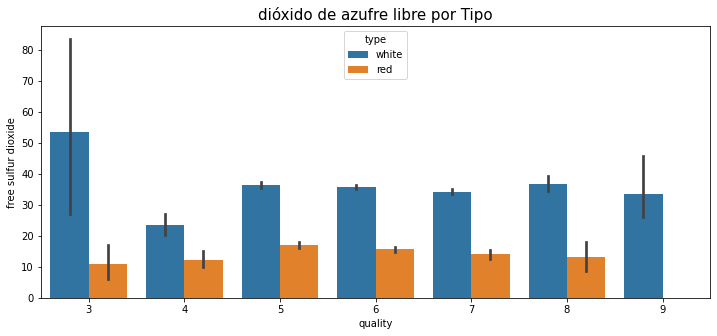

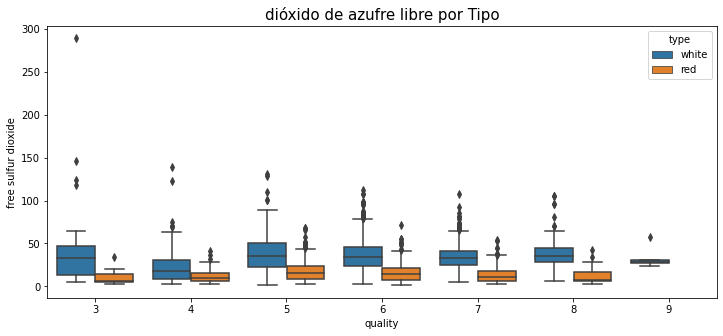

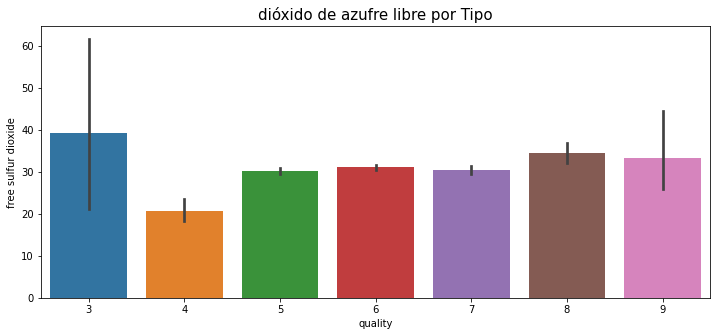

In [22]:
# Graficamos los Dióxidos de azufre libres

"""
Dioxido de Azufre Libre: Se utiliza como conservante y antioxidante. Es la variable más importante para la conservación del vino.

Tiende a aumentar en ambos tipos, el vino tinto mantiene niveles más bajos, a diferencia del vino blanco con nota más baja, que tiene valores más altos de esta variable.

Gráficamente el vino blanco con calificación 3 tiene datos que superan en gran magnitud el comportamiento de esta variable

"""

graficar_variables('free sulfur dioxide', 'dióxido de azufre libre por Tipo')

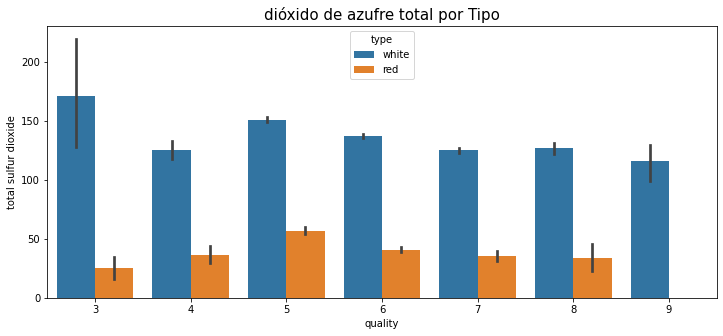

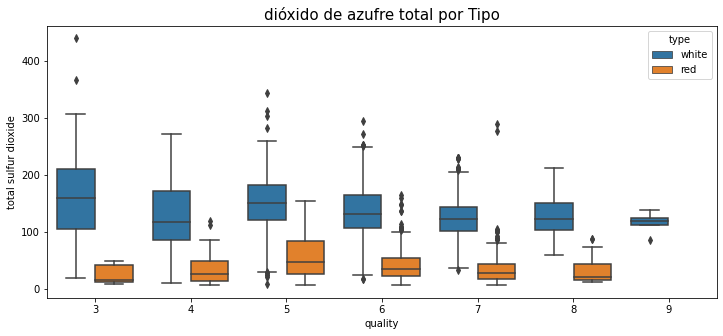

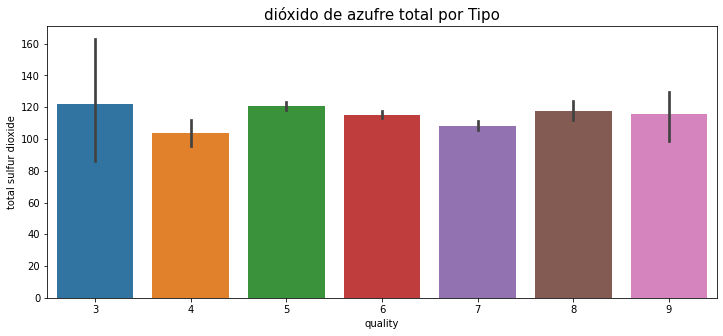

In [23]:
# Graficamos el Dióxido de azufre total

"""
Dioxido de Azufre Total: Permite obtener vinos menos oxidados, con mayor acidez, aroma y menor acidez volatil. Permite obtener vinos menos oxidados, dotados de un mejor color y aroma, y una menor acidez volátil, debido a sus efectos como: Antioxidante, Antioxidásico, Antimicrobiano.

Los niveles del vino blanco son mucho más altos que el vino tinto, los niveles más altos se encuentran entre las notas 3, 5 y 6.

"""

graficar_variables('total sulfur dioxide', 'dióxido de azufre total por Tipo')

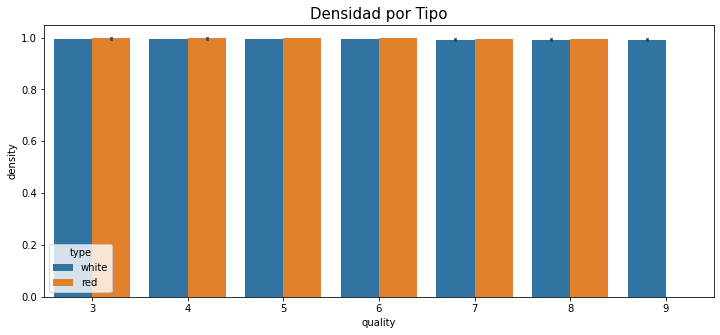

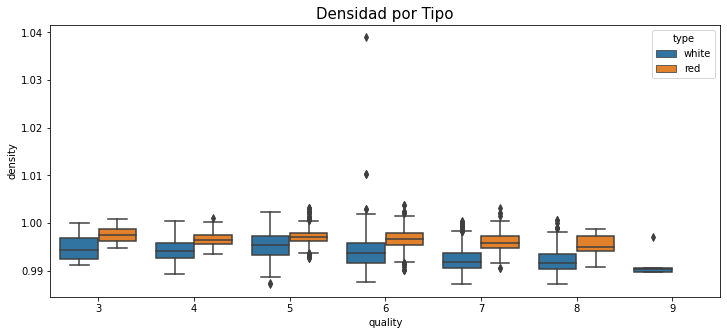

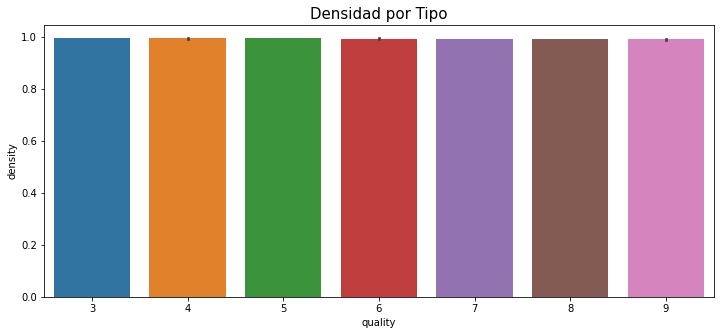

In [24]:
# Graficamos La densidad

"""
Densidad: Relación entre la masa y el volumen del fluido.

Todos mantienen niveles muy cercanos a uno en cuanto a su densidad.

Gráficamente el vino blanco con calificación 6 tiene datos que superan en gran magnitud el comportamiento de esta variable

"""

graficar_variables('density', 'Densidad por Tipo')

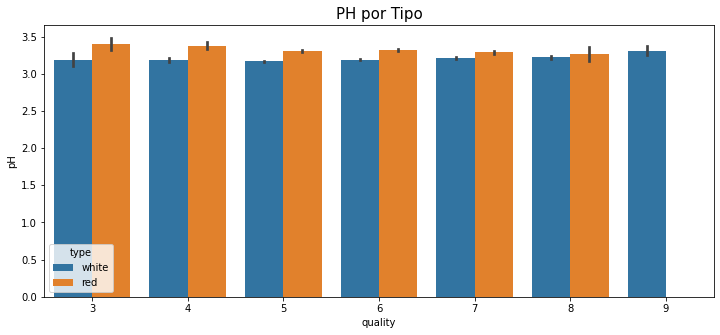

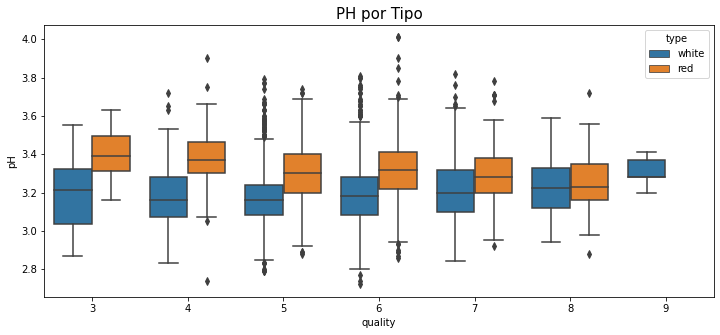

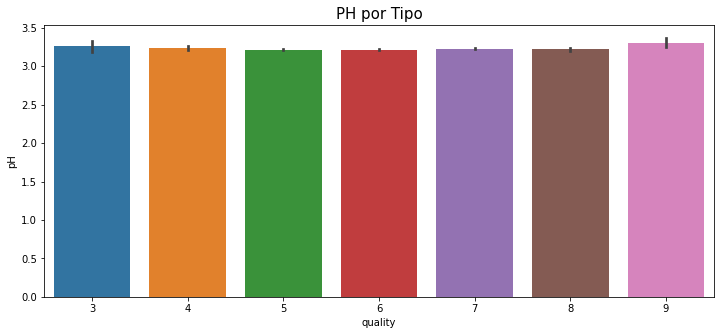

In [25]:
# Graficamos el PH

"""
PH: ácido o básico

El vino tinto tiende a tener ligeramente un PH mayor que el blanco.

"""

graficar_variables('pH', 'PH por Tipo')

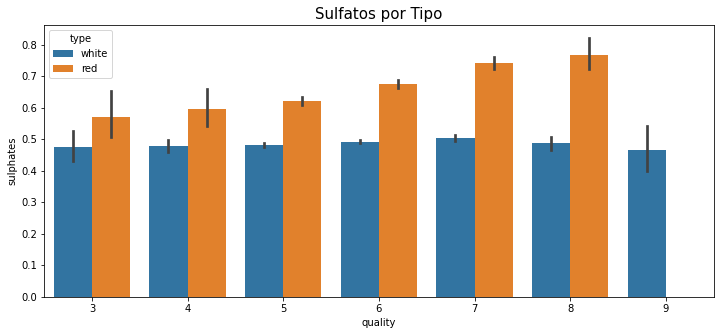

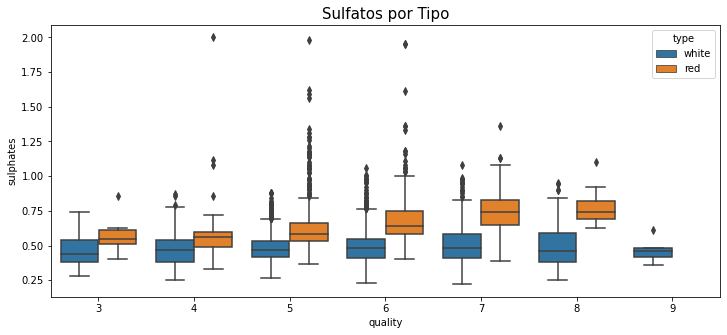

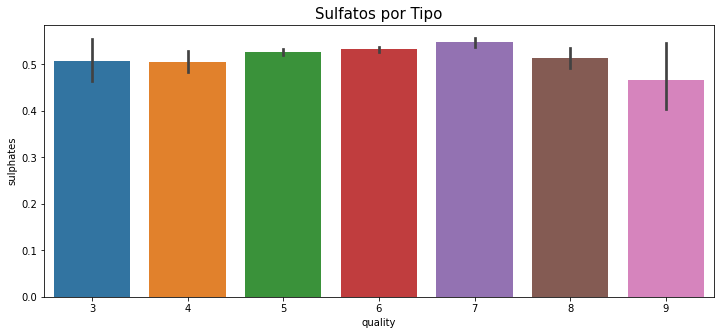

In [26]:
# Graficamos Los Sulfatos

"""
Sulfatos: Variante del dioxido de azufre. Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (S02), que actúa como antimicrobiano y antioxidante.

El vino blanco mantiene los mismos niveles de sulfatos, a diferencia que el vino tinto que mientras mayor sea, mejor es la calidad de este.
Aún así se mantiene en niveles muy bajos, siendo máximo 0,8 [gr/l]

"""

graficar_variables('sulphates', 'Sulfatos por Tipo')

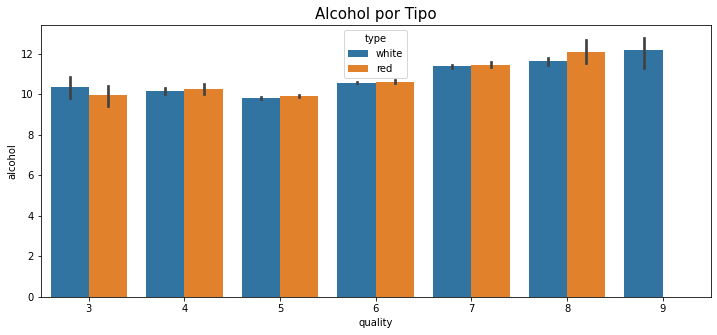

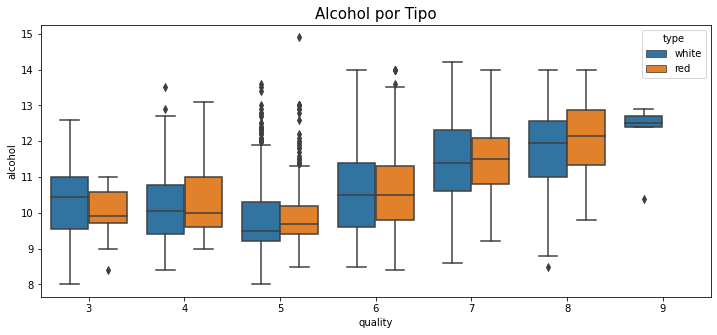

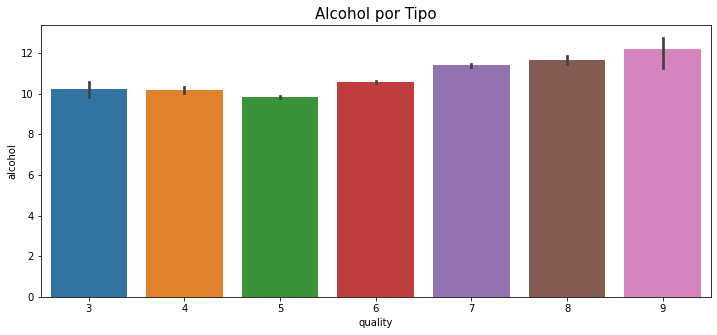

In [27]:
# Graficamos el nivel de Alcohol 

"""
Alcohol: Cantidad de grado alcoholico

En ambos tipos, mientras más alcohol tiene, mejor es la calidad del vino.

"""

graficar_variables('alcohol', 'Alcohol por Tipo')

Función para Graficar una matriz de Correlación de los diferentes tipos de Vino.

In [28]:
# Función para graficar Matrices de Correlación. 

def matriz_correlacion(datos_correlacion, titulo, color_matriz):
  fig, plt.figure(figsize=(10, 8))
  ax = sns.heatmap(datos_correlacion, annot=True,cmap=color_matriz)
  ax.set_title(titulo, fontsize=15)

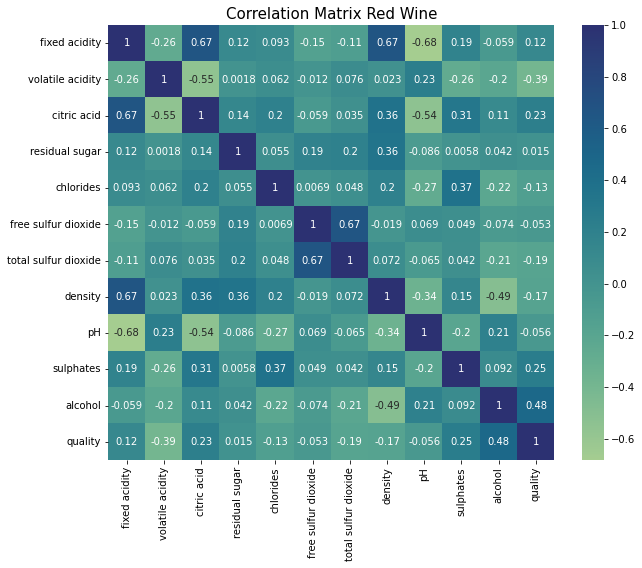

In [29]:
# Ejecutamos una Matriz de Correlación para el Vino Tinto

corr_df_r = wine_r.corr(method='pearson')
matriz_correlacion(corr_df_r, 'Correlation Matrix Red Wine', 'crest')

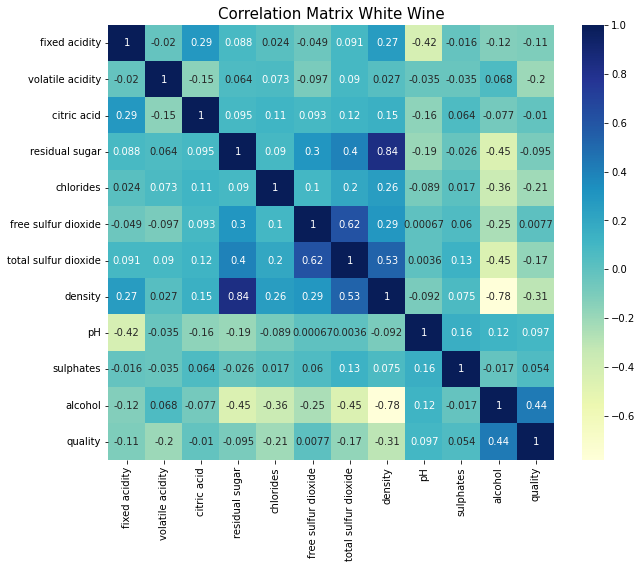

In [30]:
# Ejecutamos una Matriz de Correlación para el Vino Blanco

corr_df_w = wine_w.corr(method='pearson')
matriz_correlacion(corr_df_w, 'Correlation Matrix White Wine', 'YlGnBu')

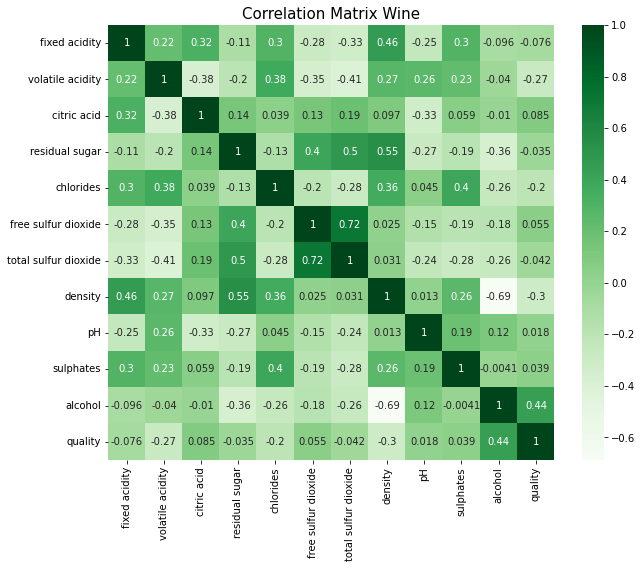

In [31]:
# Ejecutamos una Matriz de Correlación para el Vino Blanco/Tinto

corr_df = wine.corr(method='pearson')
matriz_correlacion(corr_df, 'Correlation Matrix Wine', 'Greens')

In [32]:
"""
A simple vista se aprecia que las variables de un vino tinto o blanco son diferentes y cómo se correlacionan estas para definir una buena calificación de un vino.

Dando un ejemplo es la acidez cítrica y la acidez fija, que para el caso del vino tinto tiene una correlación de 0.67 y para los blancos 3.2, siendo un factor relevante en los vinos tintos. 

Para continuar con el análisis, procederemos a revisar que variables tienen correlación con la calidad del vino para ambos tipos. 
Con la finalidad de analizar en mayor detalle con gráficos de correlación y dispersión entre las variables más representativas.

"""

'\nA simple vista se aprecia que las variables de un vino tinto o blanco son diferentes y cómo se correlacionan estas para definir una buena calificación de un vino.\n\nDando un ejemplo es la acidez cítrica y la acidez fija, que para el caso del vino tinto tiene una correlación de 0.67 y para los blancos 3.2, siendo un factor relevante en los vinos tintos. \n\nPara continuar con el análisis, procederemos a revisar que variables tienen correlación con la calidad del vino para ambos tipos. \nCon la finalidad de analizar en mayor detalle con gráficos de correlación y dispersión entre las variables más representativas.\n\n'

Función para Graficar la Correlación de 6.7

In [33]:
# Vino Tinto, correlación de 6.7
def graficar_correlacion(eje_x, eje_y):
  sns.set_style("dark")
  plt.figure(figsize=(8,6))
  ax = sns.regplot(x=eje_x, y=eje_y, color = 'Red', data=wine_r, scatter_kws={'alpha':0.2})
  plt.show()

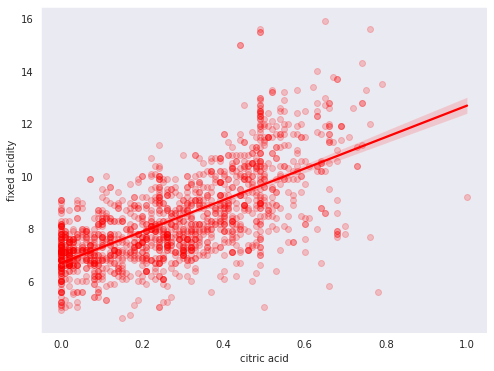

In [34]:
# LLamamos a la función y le pasamos los parametros acido citrico y acidez
graficar_correlacion('citric acid', 'fixed acidity')

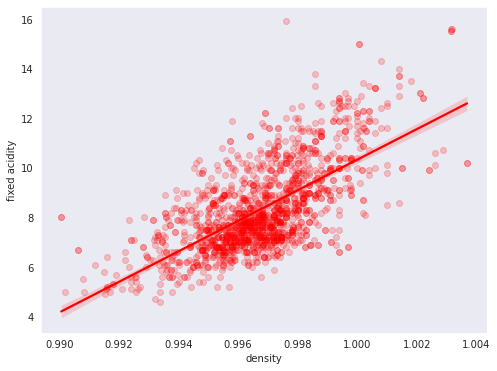

In [35]:
# LLamamos a la función y le pasamos los parametros densidad y acidez
graficar_correlacion('density', 'fixed acidity')

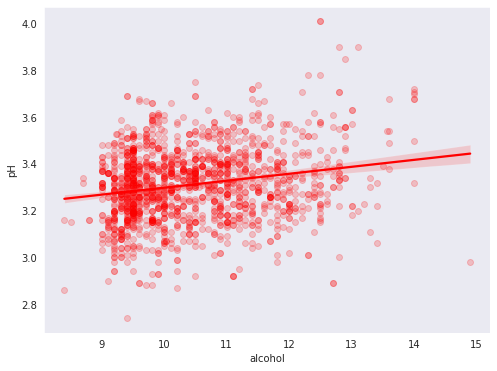

In [36]:
# LLamamos a la función y le pasamos los parametros alcohol y ph
graficar_correlacion('alcohol', 'pH')

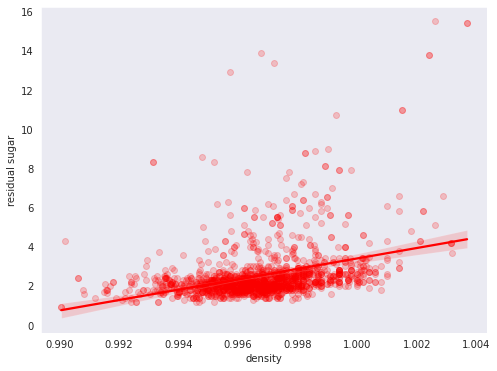

In [37]:
# LLamamos a la función y le pasamos los parametros densidad y azucar residual
graficar_correlacion('density', 'residual sugar')

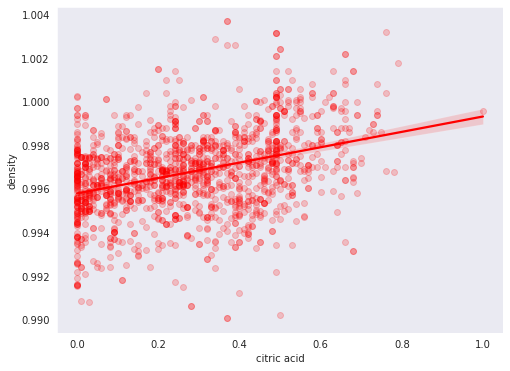

In [38]:
# LLamamos a la función y le pasamos los parametros acido citrico y densidad
graficar_correlacion('citric acid', 'density')

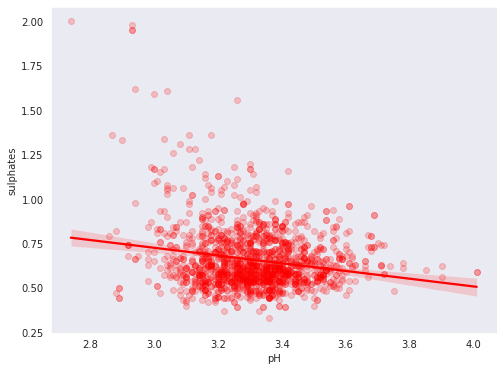

In [39]:
# LLamamos a la función y le pasamos los parametros ph y sulfatos
graficar_correlacion('pH', 'sulphates')

Funcion para Graficar la Dispersion.

In [40]:
# plt.style.use('fivethirtyeight')

def graficar_dispersion(eje_x, eje_y, label_x, label_y, titulo):
  plt.figure(figsize=(10,5))
  plt.scatter(x=eje_x, y=eje_y, c='quality', data=wine_r)
  plt.xlabel(label_x)
  plt.ylabel(label_y)
  plt.title(titulo)

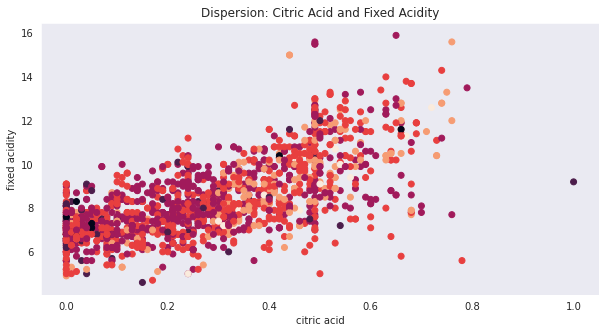

In [41]:
# Llamamos a la funcion y le pasamos los parametros
graficar_dispersion('citric acid', 'fixed acidity', 'citric acid', 
                    'fixed acidity', 'Dispersion: Citric Acid and Fixed Acidity')

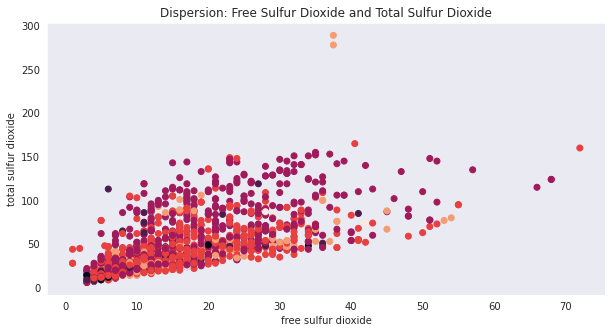

In [42]:
# Llamamos a la funcion y le pasamos los parametros
graficar_dispersion('free sulfur dioxide', 'total sulfur dioxide', 'free sulfur dioxide', 
                    'total sulfur dioxide', 'Dispersion: Free Sulfur Dioxide and Total Sulfur Dioxide')

In [43]:
# Los modelos de ML serán realizados con el df de vino tinto, se elimina el campo type para aplicar el modelo

wine_r2 = wine_r.drop('type', axis=1)
wine_r2



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [44]:
#Cantidad de filas y columnas del df.
#Valores únicos para la calificación de vino

target = 'quality'
n_rows,n_cols=wine_r2.shape
print(f"dimentions: {n_rows}, {n_cols}")
print(f"Uniques Target Values(Quality): {wine_r2[target].unique()}")

dimentions: 1593, 12
Uniques Target Values(Quality): [5 6 7 4 8 3]


#**4. Modelado**


In [45]:
#importar librerías de ML

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.utils.vis_utils import plot_model 
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split



Modelo 1: Regresion Oriented - keras Sequential


In [46]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=[n_cols-1]),
    layers.Dense(128,activation='relu',input_shape=[n_cols-1], kernel_initializer='uniform', bias_initializer='zeros'),
    
    layers.Dropout(0.4),
    layers.BatchNormalization(),
    layers.Dense(128,activation='relu', kernel_initializer='uniform', bias_initializer='zeros'),
    
    layers.Dropout( 0.4),
    layers.BatchNormalization(),
    layers.Dense(128,activation='relu', kernel_initializer='uniform', bias_initializer='zeros'),
    
    layers.BatchNormalization(),
    layers.Dense(1),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 11)               44        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 128)               1536      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [47]:
model.compile(
    optimizer='adam',
    loss='mae',
    metrics=['mae'],
)

In [48]:
#Definir Variables lara entrenar y testear

X = wine_r2.drop(target,axis=1)
y = wine_r2[target]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Minimum Validation Loss: 0.44814804196357727


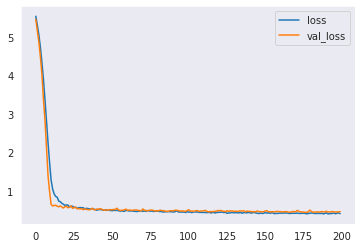

In [49]:
EPOCHS = 200

history = model.fit(
    x_train, 
    y_train,
    validation_data=(x_test,y_test),
    batch_size=90,
    epochs=EPOCHS,
   verbose=0,
)

history_wine_r = pd.DataFrame(history.history)
history_wine_r.loc[0:, ['loss', 'val_loss']].plot()
print(f"Minimum Validation Loss: {history_wine_r['val_loss'].min()}")

In [50]:
y_pred_t = model.predict(x_test)
y_pred = np.round(y_pred_t,0)

15/15 [==============================] - 0s 2ms/step


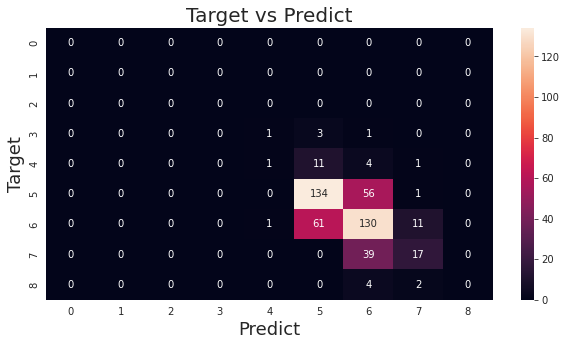

In [51]:
#Analizando los resultados entre la calificación y la predicción, son bastante consecuentes, daddo que están en el mismo rango, entre 4 y 7
plt.figure(figsize=(10,5))
confusion_matrix = tf.math.confusion_matrix(y_test,y_pred)
ax=sns.heatmap(confusion_matrix,annot=True, fmt="d")
ax.set_xlabel("Predict",size=18);
ax.set_ylabel("Target",size=18);
ax.set_title("Target vs Predict",size=20);

In [52]:
#Evaluación usando todas las muestras del conjunto de prueba
evaluations = model.evaluate(x=x_test, y=y_test)
acc = keras.metrics.Accuracy()
acc.update_state(y_test,y_pred)

print ("Loss = " + str(evaluations[0]))
print ("MAE (Test Data)= " + str(evaluations[1]))
print ("Accuracy (Test Data)= ", acc.result().numpy())

15/15 [==============================] - 0s 2ms/step - loss: 0.4677 - mae: 0.4677
Loss = 0.46772634983062744
MAE (Test Data)= 0.46772634983062744
Accuracy (Test Data)=  0.58995813


Modelo 2: Clasification Oriented - keras Sequential

In [53]:
model2=keras.Sequential([
    layers.BatchNormalization(input_shape=[n_cols-1]),
    layers.Dense(128,activation='relu',input_shape=[n_cols-1], kernel_initializer='uniform', bias_initializer='zeros'),

    layers.Dropout(0.35),
    layers.BatchNormalization(),
    layers.Dense(413,activation='relu', kernel_initializer='uniform', bias_initializer='zeros'),

    layers.Dropout(0.86),
    layers.BatchNormalization(),
    layers.Dense(952,activation='relu', kernel_initializer='uniform', bias_initializer='zeros'),

    layers.BatchNormalization(),
    layers.Dense(11, activation='softmax'),
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_4 (Batc  (None, 11)               44        
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 128)               1536      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_5 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 413)               53277     
                                                                 
 dropout_3 (Dropout)         (None, 413)              

In [54]:
model2.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'],
)

In [55]:
#Definir Variables para entrenar y testear
X = wine_r2.drop(target,axis=1)
y = wine_r2[target]
y_onehot = np.eye(11)[y]
x_train, x_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.30, random_state=42)

Minimum Validation Loss: 0.9562515020370483
Max Validation accuracy: 0.6004183888435364


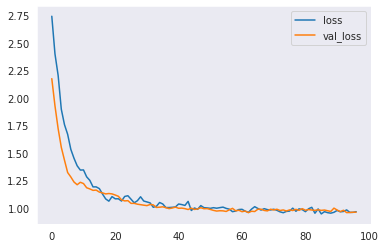

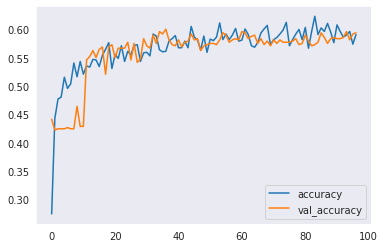

In [56]:
EPOCHS = 152
early_stopping = keras.callbacks.EarlyStopping(
    patience=34,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model2.fit(
    x_train, y_train,
    validation_data=(x_test,y_test),
    batch_size=74,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    verbose=0,
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(f"Minimum Validation Loss: {history_df['val_loss'].min()}")
history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()
print(f"Max Validation accuracy: {history_df['val_accuracy'].max()}")

In [57]:
y_pred_one_hot = model2.predict(x_test)
y_pred = np.argmax(y_pred_one_hot, axis=1)

15/15 [==============================] - 0s 4ms/step


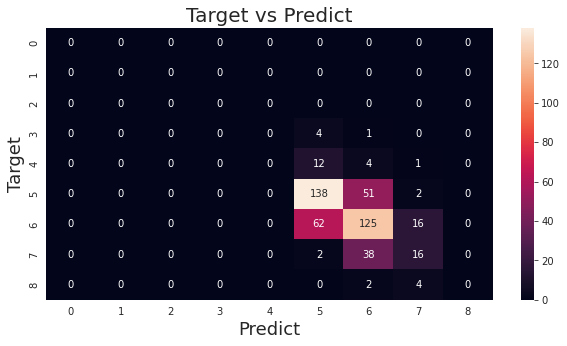

In [58]:
#Analizando los resultados entre la calificación y la predicción, son bastante consecuentes, daddo que están en el mismo rango, entre 4 y 7
plt.figure(figsize=(10,5))
confusion_matrix = tf.math.confusion_matrix( np.argmax(y_test, axis=1),y_pred)
ax=sns.heatmap(confusion_matrix,annot=True, fmt="d")
ax.set_xlabel("Predict",size=18);
ax.set_ylabel("Target",size=18);
ax.set_title("Target vs Predict",size=20);

In [59]:
# Evaluación usando todas las muestras del conjunto de prueba
evaluations = model2.evaluate(x=x_test, y=y_test)
acc = keras.metrics.Accuracy()

print ("Loss = " + str(evaluations[0]))
print ("Accuracy(Test Data)= " + str(evaluations[1]))

15/15 [==============================] - 0s 5ms/step - loss: 0.9563 - accuracy: 0.5837
Loss = 0.9562515020370483
Accuracy(Test Data)= 0.5836820006370544


In [60]:
wine_w.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [61]:
wine_w2 = wine_w.drop('type', axis=1)
wine_w2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4891,5.7,0.21,0.32,0.9,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Exploración de datos básicos

In [62]:
from scipy import stats
z = np.abs(stats.zscore(wine_w2))
print(z)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.171786          0.080292     0.213402        2.821444   0.035318   
1          0.658230          0.218161     0.047979        0.945568   0.147805   
2          1.476097          0.019192     0.544247        0.099729   0.193585   
3          0.408933          0.478230     0.117443        0.415290   0.559830   
4          0.408933          0.478230     0.117443        0.415290   0.559830   
...             ...               ...          ...             ...        ...   
4891       1.369672          0.677199     0.117443        1.083626   0.355782   
4893       0.776804          0.677199     0.365577        0.945568   0.310001   
4894       0.302509          0.417130     0.213402        0.316677   0.056243   
4896       1.606820          0.118677     0.282866        1.044181   1.088271   
4897       1.013951          0.677199     0.378824        1.103348   1.179832   

      free sulfur dioxide  

In [63]:
#Eliminación de valores atípicos basada en la puntuación Z

threshold = 3
print(np.where(z > 3))

(array([  19,   22,   38,   39,   69,  141,  148,  163,  171,  175,  184,
        187,  188,  189,  200,  200,  214,  219,  222,  241,  242,  244,
        258,  260,  262,  283,  283,  285,  304,  314,  314,  328,  347,
        360,  383,  393,  431,  436,  456,  470,  494,  509,  515,  540,
        583,  628,  641,  665,  669,  669,  681,  710,  721,  726,  737,
        738,  739,  751,  752,  754,  755,  799,  800,  806,  809,  813,
        831,  833,  838,  845,  852,  852,  855,  856,  857,  904,  924,
        926,  951,  956,  956,  957,  957,  991,  993, 1001, 1006, 1011,
       1011, 1011, 1013, 1017, 1028, 1028, 1030, 1099, 1100, 1128, 1134,
       1139, 1147, 1154, 1156, 1190, 1193, 1193, 1204, 1205, 1215, 1221,
       1221, 1226, 1230, 1230, 1231, 1233, 1239, 1248, 1258, 1269, 1270,
       1280, 1280, 1283, 1285, 1288, 1302, 1311, 1315, 1318, 1328, 1345,
       1345, 1348, 1349, 1361, 1362, 1370, 1377, 1393, 1393, 1394, 1395,
       1399, 1399, 1412, 1416, 1421, 1431, 1433, 1

In [64]:
z.shape

(4870, 12)

In [65]:
df_o = wine_w2[(z < 3).all(axis=1)]

df_o

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4891,5.7,0.21,0.32,0.9,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [66]:
wine_w2.shape

(4870, 12)

In [67]:
df_o.shape

(4457, 12)

In [68]:
#Train-test-split

from sklearn.model_selection import train_test_split
X = df_o.drop(columns = 'quality')
y = df_o['quality']

In [69]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [70]:
y.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

Ajuste básico Random Forest

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [72]:
y_pred = clf.predict(X_test)

In [73]:
from sklearn import metrics

In [74]:
print('Accuracy: ', metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.6816143497757847


In [75]:
wine_w2.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [76]:
feature_imp = pd.Series(clf.feature_importances_, index=df_o.columns[:11]).sort_values(ascending=False)
feature_imp

alcohol                 0.119362
density                 0.103946
volatile acidity        0.102082
free sulfur dioxide     0.094453
total sulfur dioxide    0.088580
residual sugar          0.087537
pH                      0.087399
chlorides               0.084583
citric acid             0.081756
sulphates               0.077247
fixed acidity           0.073055
dtype: float64

Visualización de importancia de características

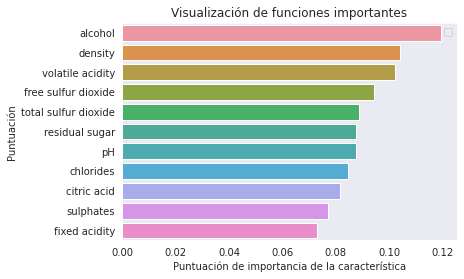

In [77]:
%matplotlib inline


sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Puntuación de importancia de la característica')
plt.ylabel('Puntuación')
plt.title("Visualización de funciones importantes")
plt.legend()
plt.show()

Ajuste fino usando RandomSearchCV

In [78]:
#Random Search Cross Validation

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
#Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [79]:
from sklearn.model_selection import RandomizedSearchCV
# Número de árboles en random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Número de características a considerar en cada división
max_features = ['auto', 'sqrt']
# Número máximo de niveles en el árbol
max_depth = [int(x) for x in np.linspace(2, 14, num = 7)]
max_depth.append(None)
# Número mínimo de muestras requeridas para dividir un node
min_samples_split = [2, 5, 10]
# Número mínimo de muestras requeridas en cada leaf node
min_samples_leaf = [1, 2, 4]
# Método de selección de muestras para entrenar cada árbol.
bootstrap = [True, False]
# Creación de random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [2, 4, 6, 8, 10, 12, 14, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [80]:
# Random grid para buscar los mejores hiperparámetros
# Primero cree el modelo base para ajustar
rf = RandomForestRegressor()
# Búsqueda aleatoria de parámetros, usando validación cruzada de 3 veces,
# busque en 100 combinaciones diferentes y use todos los núcleos disponibles
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Ajustar el modelo de búsqueda aleatoria
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [81]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [82]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test,y_test)

Model Performance
Average Error: 0.4380 degrees.
Accuracy = 92.45%.


In [83]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 0.3897 degrees.
Accuracy = 93.25%.


In [84]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.87%.


Ajuste fino con GridSearchCV

In [85]:
#Grid Search with Cross Validation

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor # Voy a dejar esto por aqui.


# Crear la cuadrícula de parámetros basada en los resultados de la búsqueda aleatoria
param_grid = {
    'bootstrap': [True],
    'max_depth': [8, 10, 12, 14],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Crear un modelo basado
rf = RandomForestRegressor()
# Crear una instancia del modelo de búsqueda de cuadrícula
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [86]:
# Ajustar la búsqueda de cuadrícula a los datos
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


{'bootstrap': True,
 'max_depth': 14,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [87]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 0.4645 degrees.
Accuracy = 91.95%.


In [88]:
#Librería para PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold
from sklearn.metrics import roc_curve,accuracy_score,f1_score,auc,confusion_matrix,roc_auc_score
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [89]:
#Definir Variables para entrenar y testear
x = wine_r2.drop('quality',axis=1)

Y = wine_r2['quality']

x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size = 0.25,random_state=44)

In [90]:
# Aplicación de PCA PARA REDUCCIÓN DE DIMENSIONALIDAD
pca = PCA(n_components = None)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[9.46310904e-01 4.82823443e-02 2.78399379e-03 1.66890806e-03
 8.81492871e-04 3.37466071e-05 1.91611858e-05 9.83117414e-06
 8.29820584e-06 1.31973887e-06 4.77505635e-10]


In [91]:
len(explained_variance)

11

In [92]:
print("Sorted List returned :")
print(sorted(explained_variance,reverse = True))

Sorted List returned :
[0.9463109036074637, 0.048282344278467136, 0.002783993794778615, 0.001668908058824105, 0.0008814928712824884, 3.3746607056665236e-05, 1.9161185766489907e-05, 9.831174142567253e-06, 8.298205838903635e-06, 1.319738873379501e-06, 4.775056349806244e-10]


In [93]:
#Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[9.46310904e-01 4.82823443e-02 2.78399379e-03 1.66890806e-03
 8.81492871e-04]


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


   CrossVal_Score_Means  CrossValerrors                    Algo
0              0.507494        0.076993  RandomForestClassifier
1              0.607237        0.035927      AdaBoostClassifier
2              0.651616        0.030916       Gradient Boosting
3              0.605537        0.036546  DecisionTreeClassifier


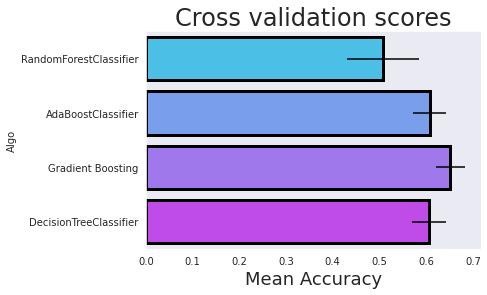

<Figure size 1080x504 with 0 Axes>

In [94]:
#Creación de Modelo
#Validación cruzada en diferentes conjuntos de algoritmos

kfold = StratifiedKFold(n_splits=8,shuffle=True, random_state=42)


rs = 15
clrs = []

clrs.append(AdaBoostClassifier(random_state=rs))
clrs.append(GradientBoostingClassifier(random_state=rs))
clrs.append(RandomForestClassifier(random_state=rs))
clrs.append(DecisionTreeClassifier(random_state = rs))

cv_results = []
for clr in clrs :
    cv_results.append(cross_val_score(clr, x_train, Y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_df = pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std,"Algo":["RandomForestClassifier","AdaBoostClassifier","Gradient Boosting",'DecisionTreeClassifier']})
g = sns.barplot("CrossVal_Score_Means","Algo",data = cv_df,orient = "h",**{'xerr':cv_std},palette='cool',edgecolor="black",linewidth=3)
g.set_xlabel("Mean Accuracy",fontsize = 18)
g = g.set_title("Cross validation scores",fontsize = 24)
plt.figure(figsize = (15,7))
print(cv_df)

In [95]:
#Ada boosting es el ganador GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
dtc = GradientBoostingClassifier()
dtc.fit(x_train, Y_train)
Y_pred = dtc.predict(x_test)
confusion_matrix(Y_test, Y_pred)

array([[  0,   0,   0,   2,   0,   0],
       [  1,   0,   8,   8,   0,   0],
       [  0,   0, 118,  47,   6,   0],
       [  0,   1,  32, 101,  13,   1],
       [  0,   0,   3,  20,  30,   0],
       [  0,   0,   1,   3,   3,   1]])

In [96]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        17
           5       0.73      0.69      0.71       171
           6       0.56      0.68      0.61       148
           7       0.58      0.57      0.57        53
           8       0.50      0.12      0.20         8

    accuracy                           0.63       399
   macro avg       0.39      0.34      0.35       399
weighted avg       0.61      0.63      0.61       399



In [97]:
print(accuracy_score(Y_test, Y_pred))

0.6265664160401002


In [102]:
#Ajuste de hiperparámetros
from sklearn.model_selection import GridSearchCV
grid_params = {
     'learning_rate': [1e-02] #, 5e-03, 2e-02
     ,'max_depth': [10]
     ,'n_estimators' : [400] 
    
   
    
}

grid_search = GridSearchCV(GradientBoostingClassifier(), grid_params, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(x_train, Y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01], 'max_depth': [10],
                         'n_estimators': [400]},
             verbose=1)

In [103]:
dtc = grid_search.best_estimator_
Y_pred = dtc.predict(x_test)  

In [104]:
print(accuracy_score(Y_test, Y_pred))

0.6441102756892231


In [105]:
# mejores parámetros y mejor puntaje
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 400}
0.6181111775254033


In [107]:
#Modelo Final
ada = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    'learning_rate': [2e-01, 15e-02]
     ,'n_estimators': [500, 600, 700] 
     ,'algorithm' : ['SAMME.R'] # 'SAMME'
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(x_train, Y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                                                    max_depth=10,
                                                                                    n_estimators=400)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME.R'], 'learning_rate': [0.2, 0.15],
                         'n_estimators': [500, 600, 700]},
             verbose=1)

In [108]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.2, 'n_estimators': 600}
0.6306669948314053


In [109]:
ada = AdaBoostClassifier(base_estimator = dtc, algorithm= "SAMME", learning_rate= 0.1, n_estimators= 90)
ada.fit(x_train, Y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                             max_depth=10,
                                                             n_estimators=400),
                   learning_rate=0.1, n_estimators=90)

In [110]:
print(confusion_matrix(Y_test, Y_pred))

[[  0   1   0   1   0   0]
 [  0   0   9   8   0   0]
 [  1   0 122  42   5   1]
 [  0   1  22 107  18   0]
 [  1   0   4  21  27   0]
 [  0   0   0   6   1   1]]


In [111]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        17
           5       0.78      0.71      0.74       171
           6       0.58      0.72      0.64       148
           7       0.53      0.51      0.52        53
           8       0.50      0.12      0.20         8

    accuracy                           0.64       399
   macro avg       0.40      0.35      0.35       399
weighted avg       0.63      0.64      0.63       399



In [112]:
print(accuracy_score(Y_test, Y_pred))

0.6441102756892231


# **5. Conclusiones**


Primera Hipotesis: 

Los vinos tintos son superiores cuando su acidez es mayor

En el caso de los tres tipos principales de acidéz se puede mencionar lo siguiente:
- Acidéz Fija: aumenta levemente en vino tinto de buena calidad, dado que es concervante y corrector de acidéz.
- Acidéz cítrica total: aumenta considerablemente en vino tinto con alta calificación, define la frescura de vino.
- Acidéz Variable: disminuye en vino tinto de buena calidad, representa principalmente el deterioro de vino en relación al tiempo que está envasado.

Al apreciar estros tres puntos, en primera instancia se puede concluir que un vino tinto de buna calidad tiene altos niveles de acidéz fija y variable.


En relación al vio blanco y su adicéz es necesario realizar más analisis, dado que en estas variables presenta valores constantes en todas sus calidades.

En cuanto al PH y el alcohol el vino tinto presenta mayor concentración entre un PH más bajo y un un grado alcoholico menor. Y para el vino blanco la concentración es bastante dispersa.

Aunque para estar seguros, el siguiente paso es clasificar los vinos buenos y malos según su calificación y repetir el análisis de PH y alcohol, para definir qué es mejor en cada tipo de vino.

Modelo de Machine Learning

Se realizaron tres modelos distintos de Machine Learning para definir cuál tiene mayor exactitud con el fin de predecir la calidad de un vino en base a sus características mencionadas anteriormente.

El resultado es el siguiente:

*   Keras: 58.36%
*   Random Forest: 93.25%
*   PCA: 64.41%

Como resultado se concluye que se utilizará el Modelo Random Forest, aunque antes de la Grid Search with Cross Validation, dado que posterior a este análisis la veracidad final es 91.92%, que aun así es un resultado por sobre el 90%, teniendo un modelo de machine learning exitoso.
